# Machine Learning Engineer Nanodegree
## Predicting Ethereum prices using supervised machine learning

## I. Definition

### Project Overview


### Problem Statement

### Metrics

## II. Analysis

### Data Exploration

In [17]:
# Import libraries for data analysis.
import numpy as np
import pandas as pd
from datetime import datetime

In [18]:
prices = pd.read_csv('data/ethereum_price.csv')
data = pd.read_csv('data/ethereum_dataset.csv')

display(data.head(n=1))
display(prices.head(n=1))

,Date(UTC),UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
0,7/30/2015,1438214400,0.0,8893,9205,7.204931e+07,0.0,11.5297,0.121,6912,1299,644,4.46,0,0,0,39316.09375,NaN


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"


In [19]:
# Data cleansing
def format_prices(df):
    # Removing last row (price invalid)
    df = df[:len(df)-1]
    df['Market Cap'] = df['Market Cap'].apply(lambda x: float(x.replace(',','')))
    df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))    
    df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,'%b %d, %Y')) 
    return df

def format_data(df):
    df['Date(UTC)'] = df['Date(UTC)'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y')) 
    return df


prices = format_prices(prices)
data = format_data(data)

/Users/nicolaskittsteiner/Documents/Codigo/advanced-analytics/jupyter/venv/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/nicolaskittsteiner/Documents/Codigo/advanced-analytics/jupyter/venv/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicolaskittsteiner/Documents/Codigo/advanced-analytics/jupyter/venv/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [20]:
# TODO: format dates, clean eth, merge price with data
# TODO: Change to logarithmic scale
prices.describe()

,Open,High,Low,Close,Volume,Market Cap
count,928.000000,928.000000,928.000000,928.000000,9.280000e+02,9.280000e+02
mean,147.052745,154.525939,139.261971,147.940592,5.477870e+08,1.399749e+10
std,263.317931,277.725855,247.229954,264.230304,1.233724e+09,2.550277e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.197360e+07
25%,7.897500,8.270000,7.615000,7.917500,6.702330e+06,6.669118e+08
50%,12.050000,12.430000,11.725000,12.030000,2.146785e+07,1.011085e+09
75%,245.407500,257.412500,224.770000,246.122500,5.329775e+08,2.270305e+10
max,1397.480000,1432.880000,1290.600000,1396.420000,9.214950e+09,1.355030e+11


In [21]:
data.describe()

,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,eth_supply,eth_marketcap,eth_hashrate,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
count,9.340000e+02,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,9.340000e+02,9.340000e+02,9.340000e+02,934.000000,294.000000
mean,1.478540e+09,144.155814,1.769615e+05,3.475212e+06,8.547182e+07,13718.483322,37142.386082,565.982695,5470.884368,516.360814,6011.986081,16.020578,3.733017e+10,4.573157e+06,7.944123e+09,27484.238725,682.227891
std,2.333990e+07,260.446827,2.732852e+05,6.053198e+06,7.849074e+06,25214.340835,57622.685360,862.787200,773.100316,320.637714,8038.566658,3.197617,5.093189e+10,1.731189e+06,1.198038e+10,4829.841152,774.888801
min,1.438214e+09,0.000000,0.000000e+00,9.205000e+03,7.204931e+07,0.000000,11.529700,0.121000,2829.000000,126.000000,575.000000,4.460000,0.000000e+00,0.000000e+00,0.000000e+00,14852.500000,0.000000
25%,1.458367e+09,7.652500,3.008325e+04,1.244900e+05,7.826808e+07,654.651087,1396.803875,19.459250,5046.750000,352.250000,1318.000000,14.140000,2.257898e+10,3.141800e+06,9.565356e+08,24715.078125,131.500000
50%,1.478520e+09,11.965000,4.586450e+04,7.875195e+05,8.575763e+07,1004.981055,5956.319100,78.132000,5864.500000,416.500000,1623.500000,14.575000,2.416869e+10,4.310826e+06,1.579041e+09,28026.171875,341.000000
75%,1.498673e+09,228.625000,2.463598e+05,3.775781e+06,9.289034e+07,21313.163174,61147.313050,959.577000,6037.000000,498.750000,8786.750000,16.890000,5.075070e+10,5.198700e+06,1.230693e+10,31674.882812,886.250000
max,1.519085e+09,1385.020000,1.349890e+06,2.704779e+07,9.768027e+07,134210.789028,243542.069800,3031.012000,6912.000000,2096.000000,33681.000000,30.310000,9.395883e+11,7.999398e+06,4.396431e+10,39316.093750,3863.000000


In [22]:
df = prices.set_index('Date').join(data.set_index('Date(UTC)'))

### Exploratory Visualization

In [23]:
df.corr()

,Open,High,Low,Close,Volume,Market Cap,UnixTimeStamp,eth_etherprice,eth_tx,eth_address,...,eth_difficulty,eth_blocks,eth_uncles,eth_blocksize,eth_blocktime,eth_gasprice,eth_gaslimit,eth_gasused,eth_ethersupply,eth_ens_register
Open,1.000000,0.998599,0.996018,0.996401,0.907942,0.999909,0.719265,0.996382,0.965406,0.958994,...,0.827897,-0.094373,0.730936,0.928859,0.097112,-0.056558,0.790723,0.949974,-0.660917,-0.444014
High,0.998599,1.000000,0.996554,0.998536,0.918371,0.998526,0.716981,0.998420,0.967274,0.956925,...,0.822658,-0.091315,0.737161,0.929075,0.092701,-0.054324,0.788737,0.949673,-0.656950,-0.437012
Low,0.996018,0.996554,1.000000,0.997980,0.890131,0.995828,0.723856,0.997794,0.963039,0.958472,...,0.832190,-0.098087,0.725672,0.930093,0.102895,-0.059606,0.794091,0.951276,-0.667215,-0.450296
Close,0.996401,0.998536,0.997980,1.000000,0.907974,0.996268,0.720645,0.999885,0.966170,0.958083,...,0.827023,-0.093832,0.732409,0.930363,0.096884,-0.057182,0.791638,0.951524,-0.661881,-0.443123
Volume,0.907942,0.918371,0.890131,0.907974,1.000000,0.908383,0.593956,0.906779,0.899016,0.834722,...,0.663763,-0.045484,0.755813,0.829678,0.017589,-0.007111,0.674706,0.839149,-0.521170,-0.296490
Market Cap,0.999909,0.998526,0.995828,0.996268,0.908383,1.000000,0.714324,0.996281,0.964968,0.960484,...,0.824932,-0.089338,0.734288,0.926796,0.092115,-0.054568,0.787568,0.948816,-0.658546,-0.449292
UnixTimeStamp,0.719265,0.716981,0.723856,0.720645,0.593956,0.714324,1.000000,0.721352,0.753546,0.740159,...,0.792748,-0.015501,0.419706,0.786152,0.109707,-0.292227,0.752793,0.784895,-0.471926,-0.656220
eth_etherprice,0.996382,0.998420,0.997794,0.999885,0.906779,0.996281,0.721352,1.000000,0.965618,0.959349,...,0.829929,-0.096389,0.730107,0.931054,0.100167,-0.057645,0.792772,0.951630,-0.664276,-0.448694
eth_tx,0.965406,0.967274,0.963039,0.966170,0.899016,0.964968,0.753546,0.965618,1.000000,0.948697,...,0.824303,-0.059061,0.767247,0.961196,0.071385,-0.079141,0.819762,0.981466,-0.679340,-0.534415
eth_address,0.958994,0.956925,0.958472,0.958083,0.834722,0.960484,0.740159,0.959349,0.948697,1.000000,...,0.865242,-0.048276,0.700268,0.920963,0.079932,-0.084619,0.802821,0.958184,-0.691977,-0.583515


In [24]:
df.corr()['Close']

Open                0.996401
High                0.998536
Low                 0.997980
Close               1.000000
Volume              0.907974
Market Cap          0.996268
UnixTimeStamp       0.720645
eth_etherprice      0.999885
eth_tx              0.966170
eth_address         0.958083
eth_supply          0.685120
eth_marketcap       0.999769
eth_hashrate        0.939107
eth_difficulty      0.827023
eth_blocks         -0.093832
eth_uncles          0.732409
eth_blocksize       0.930363
eth_blocktime       0.096884
eth_gasprice       -0.057182
eth_gaslimit        0.791638
eth_gasused         0.951524
eth_ethersupply    -0.661881
eth_ens_register   -0.443123
Name: Close, dtype: float64

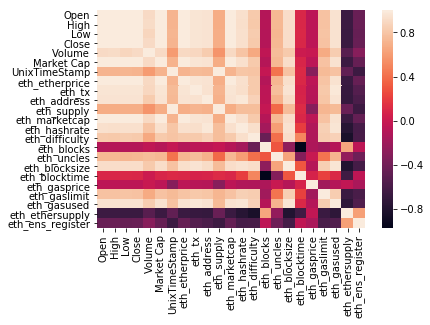

In [25]:
%matplotlib inline
from seaborn import heatmap
heatmap(df.corr(),yticklabels=df.columns, xticklabels=df.columns)

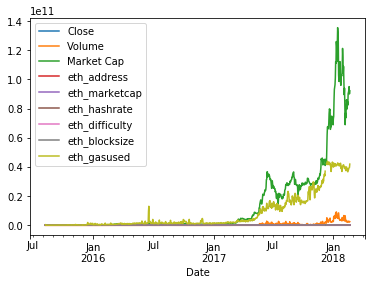

In [26]:
fields = ['Close', 'Volume','Market Cap','eth_address', 'eth_marketcap', 
          'eth_hashrate','eth_difficulty','eth_blocksize', 'eth_gasused']
df[fields].plot()

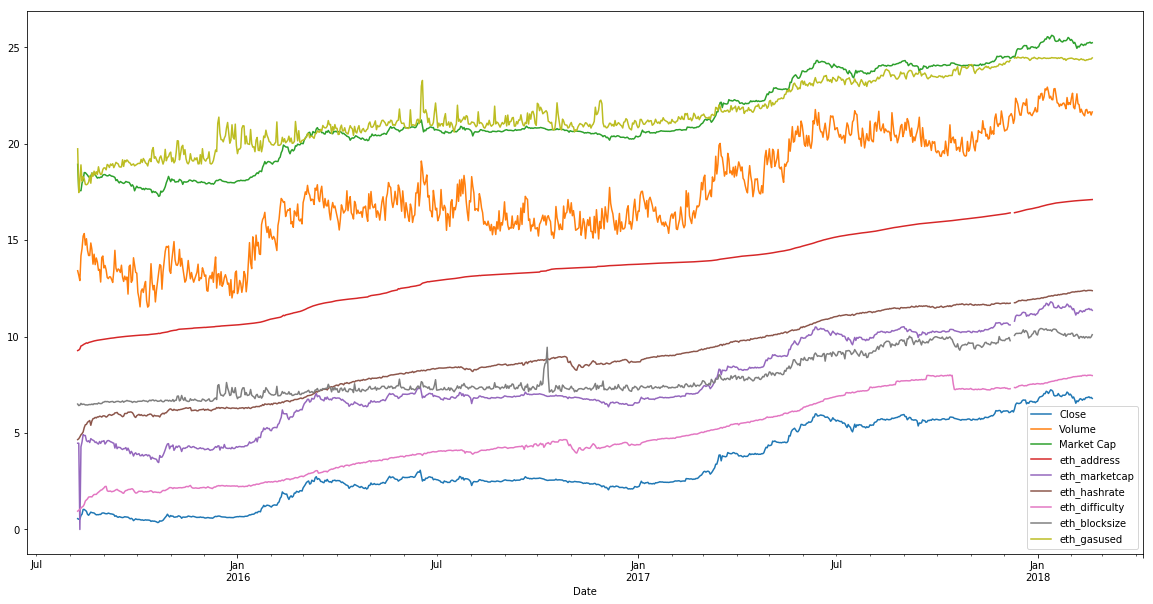

In [27]:
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[fields] = df[fields].apply(lambda x: np.log(x + 1))
features_log_transformed[fields].plot(figsize=(20,10))


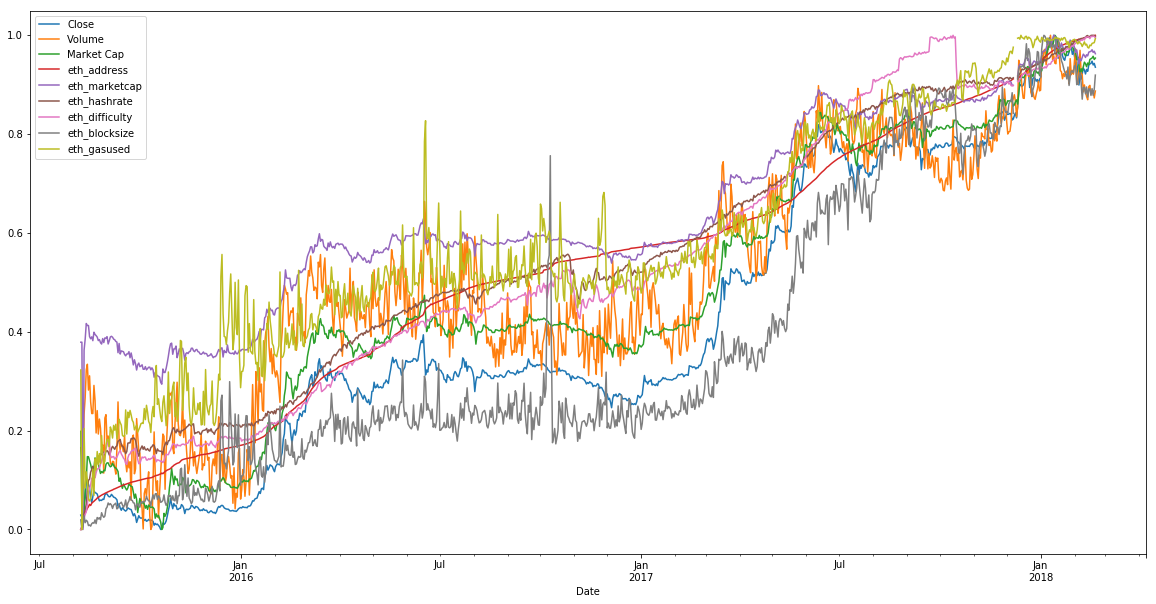

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[fields] = scaler.fit_transform(features_log_transformed[fields])
features_log_minmax_transform[fields].plot(figsize=(20,10))


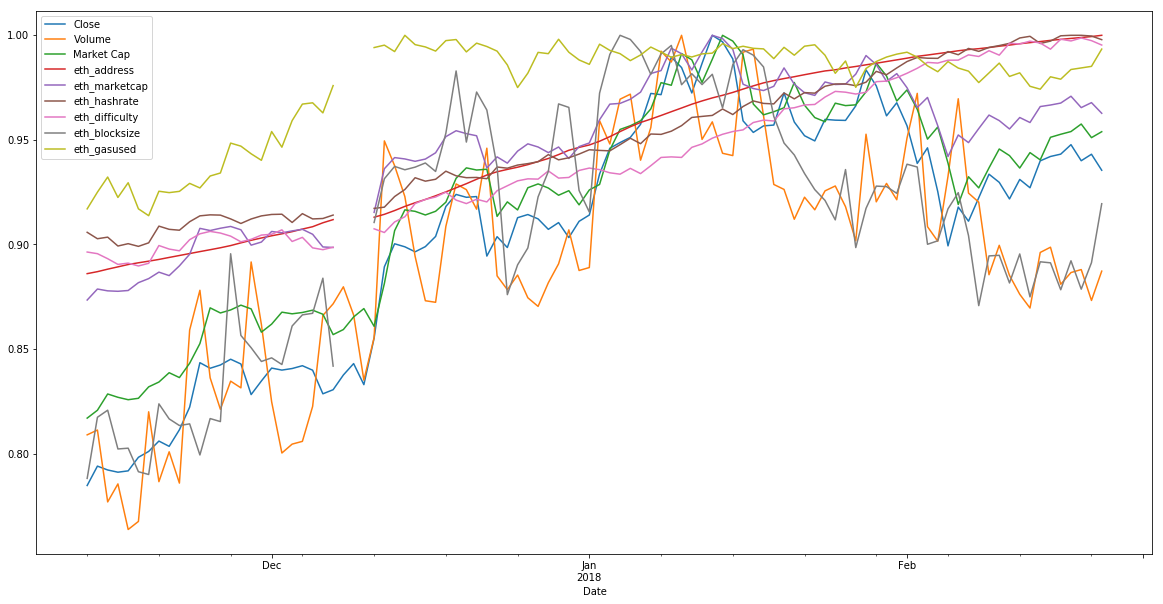

In [29]:
# Last 100 days
features_log_minmax_transform[:100][fields].plot(figsize=(20,10))

In [42]:
# Split training and test 70 / 30
model_fields = ['Volume','Market Cap','eth_address', 'eth_marketcap', 
          'eth_hashrate','eth_difficulty','eth_blocksize', 'eth_gasused']

features_log_minmax_transform = features_log_minmax_transform.dropna()
X_train = features_log_minmax_transform[model_fields][0:int(len(features_log_minmax_transform)*0.7)]
y_train = features_log_minmax_transform['Close'][0:int(len(features_log_minmax_transform)*0.7)]
X_test = features_log_minmax_transform[model_fields][int(len(features_log_minmax_transform)*0.7):
                                                     len(features_log_minmax_transform)]
y_test = features_log_minmax_transform['Close'][int(len(features_log_minmax_transform)*0.7):
                                                len(features_log_minmax_transform)]

In [43]:
print(len(X_train), len(y_train), len(X_test), len(y_test), len(df))

(205, 205, 89, 89, 928)


In [67]:
# Regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib as mpl

classifier = LinearRegression()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_train)
error = mean_squared_error(y_train, guesses)
print(guesses)
#pd.DataFrame(temp).plot()


[0.93448803 0.94313451 0.93920816 0.94838574 0.94282461 0.94127825
 0.93973431 0.9267671  0.93060387 0.92155347 0.92852454 0.93283848
 0.92159207 0.91012483 0.91591113 0.89895487 0.92499759 0.94784838
 0.93975872 0.95639064 0.9680399  0.96218693 0.97606368 0.9832768
 0.96825139 0.95987479 0.9596086  0.96148569 0.95080011 0.95311014
 0.96056937 0.97332318 0.95856697 0.9548539  0.95647403 0.96088289
 0.98989162 0.99873932 1.00114673 0.98733066 0.97288462 0.9864195
 0.99064994 0.9724428  0.96987946 0.95481778 0.94868551 0.94541531
 0.9447518  0.93150896 0.91286123 0.90979866 0.90021644 0.9096302
 0.90511815 0.91004913 0.91267918 0.90644874 0.89691231 0.90164873
 0.89326657 0.91962093 0.92147373 0.92352018 0.91834914 0.90545239
 0.90031502 0.89841822 0.90061041 0.90158188 0.89199363 0.85616792
 0.82783263 0.82858313 0.83919084 0.8430779  0.84200871 0.8403039
 0.84116888 0.83233667 0.83011732 0.84303092 0.84543915 0.84409953
 0.84223925 0.84344462 0.82224057 0.81308883 0.80511055 0.80774055

### Algorithms and Techniques

### Benchmark